In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
spotify = pd.read_csv("spotify_music.csv")
print(spotify)

        acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1f

In [59]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [60]:
spotify.head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [92]:
print(spotify.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [62]:
#Seeing the correlation numbers. Default is Pearsons.
spotify.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968,-0.607515
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713,0.159095
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199,0.105661
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418,0.540850
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275,0.151619
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188,-0.114259
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592,0.019194
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781,-0.011852
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520,0.465189
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592,-0.048922


In [93]:
#Creating a variable pop as the popularity column.
pop= spotify['popularity']

In [64]:
pop.describe()

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

In [65]:
pop1= spotify[['popularity', 'name']]

In [66]:
print(pop1.sort_values(by=['popularity'], ascending=False).head(50))

       popularity                                     name
20062         100                          drivers license
19862          96                   Mood (feat. iann dior)
19866          96                                positions
19886          95                                   DÁKITI
19976          95                                  BICHOTA
19868          94                                    34+35
19870          94                                  Whoopty
19872          94                              WITHOUT YOU
19876          94                           Therefore I Am
19928          94                       LA NOCHE DE ANOCHE
19900          93                       you broke me first
19878          93                  What You Know Bout Love
39252          92                             The Business
76406          92                             Hecha Pa' Mi
19884          92                                  HOLIDAY
19880          92          WAP (feat. Megan Thee Stallio

In [67]:
spotify = spotify[spotify['year'] >= 2011]
print(spotify)

        acousticness                             artists  danceability  \
9087         0.88700                   ['Frank Sinatra']         0.319   
9091         0.93800                   ['Frank Sinatra']         0.269   
9111         0.88100                   ['Joni Mitchell']         0.644   
9117         0.95500                   ['Joni Mitchell']         0.627   
9119         0.88800                   ['Joni Mitchell']         0.581   
...              ...                                 ...           ...   
174384       0.00917  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385       0.79500                    ['Alessia Cara']         0.429   
174386       0.80600                       ['Roger Fly']         0.671   
174387       0.92000                    ['Taylor Swift']         0.462   
174388       0.23900                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
9087         187333   0.201         0  1hx7X9c

(array([5.8714e+04, 1.5089e+04, 2.3744e+04, 2.6894e+04, 2.1249e+04,
        1.5423e+04, 9.0490e+03, 3.6280e+03, 5.5500e+02, 4.4000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

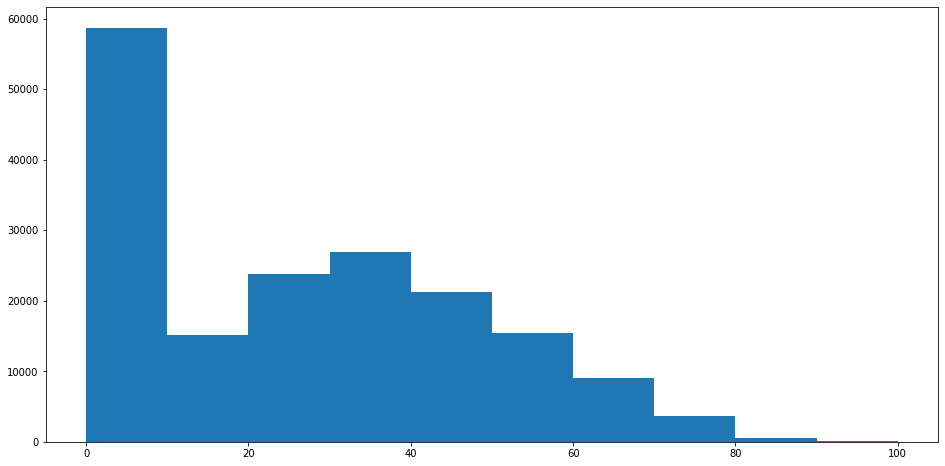

In [68]:
#Per standard, using a histogram will show the skewness of the column. The need to scale or take the log of the
#column might be required but further exploration is required.
plt.figure(figsize = (16,8))
plt.hist(pop)

In [69]:
spotify.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [75]:
train, test =  train_test_split(spotify, test_size=0.25, random_state=1)

In [76]:
x_train = train[['year', 'energy', 'explicit', 'danceability', 'loudness']]
y_train = train[['popularity']]

x_test = test[['year', 'energy', 'explicit', 'danceability', 'loudness']]
y_test = test[['popularity']]

In [77]:
model = LinearRegression()

In [85]:
#As an initial regression model, I always run linear regression first to get a feel for the range of the error numbers.
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.240
Mean squared error: 689.307
R2 Score: 0.257


In [89]:
#Importing support vector regression from sklearn, running the analysis.
from sklearn.svm import SVR

svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(x_train, y_train.values.ravel())

y_svr_pred = svr.predict(x_test)
print('Score: %.3f' % svr.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_svr_pred))
print('R2: %.3f' % r2_score(y_test, y_svr_pred))

Score: 0.139
Mean squared error: 783.519
R2: 0.156


In [91]:
#Importing nearest neighbors regression from sklearn, running the analysis.
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(x_train, y_train)
y_knn = knn.predict(x_test)

print('Score: %.3f' % knn.score(x_train, y_train))
print('RMSE: %.3f' % mean_squared_error(y_test, y_knn))
print('R2 Score: %.5f' % r2_score(y_test, y_knn))

Score: 0.493
RMSE: 626.035
R2 Score: 0.32527
